<a href="https://colab.research.google.com/github/RifaldiAchmad/dicoding_task_2/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Rifaldi_Achmad_Faisal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
!git clone https://github.com/RifaldiAchmad/dicoding_task_2.git

fatal: destination path 'dicoding_task_2' already exists and is not an empty directory.


In [18]:
dataset = pd.read_csv('/content/dicoding_task_2/dataset/cluster.csv')

In [19]:
dataset.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DateDifference (Days),KMeans_Cluster
0,-1.994061,0.540538,1.221714,-1.225361,1.245125,-1.337394,-0.251275,-0.214735,0.401244,0.827072,0
1,0.646895,0.540538,-0.492416,-1.225361,1.177373,-1.337394,0.525301,-0.214735,1.303267,0.183649,0
2,-0.244470,0.540538,0.160586,1.247014,-1.759013,1.319064,-0.765592,-0.214735,-0.979685,0.065231,1
3,0.064507,0.540538,0.976839,1.247014,-1.047417,1.319064,-1.875714,-0.214735,0.871829,0.636300,1
4,-2.029619,-1.850010,-1.635170,1.247014,-1.047417,1.319064,1.002578,-0.214735,0.741806,-0.945866,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [20]:
X = dataset.drop('KMeans_Cluster', axis=1)
y = dataset['KMeans_Cluster']

print("Training dataset shape:", X.shape)
print("Testing dataset shape:", y.shape)

Training dataset shape: (2512, 10)
Testing dataset shape: (2512,)


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

Karena kategori biner pada variabel target, maka dipilih model-model klasifikasi sederhana supaya sesuai dengan kebutuhan,
* Regresi logistik cocok untuk klasifikasi biner
* Decision tree merupakan contoh sederhana model tree based tunggal untuk klasifikasi
* KNN merupakan model distace based sederhana untuk klasifikasi

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [23]:
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate on training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    # Evaluate on testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Append results
    results.append({
        "Model": model_name,
        "Dataset": "Train",
        "Accuracy": train_accuracy,
        "Precision": train_precision,
        "Recall": train_recall,
        "F1-Score": train_f1
    })
    results.append({
        "Model": model_name,
        "Dataset": "Test",
        "Accuracy": test_accuracy,
        "Precision": test_precision,
        "Recall": test_recall,
        "F1-Score": test_f1
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)
df_results

,Model,Dataset,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,Train,0.995449,0.995478,0.995449,0.995437
1,Logistic Regression,Test,0.994695,0.994733,0.994695,0.994678
2,Decision Tree,Train,1.000000,1.000000,1.000000,1.000000
3,Decision Tree,Test,0.993369,0.993439,0.993369,0.993384
4,K-Nearest Neighbors,Train,0.990330,0.990385,0.990330,0.990288
5,K-Nearest Neighbors,Test,0.994695,0.994733,0.994695,0.994678


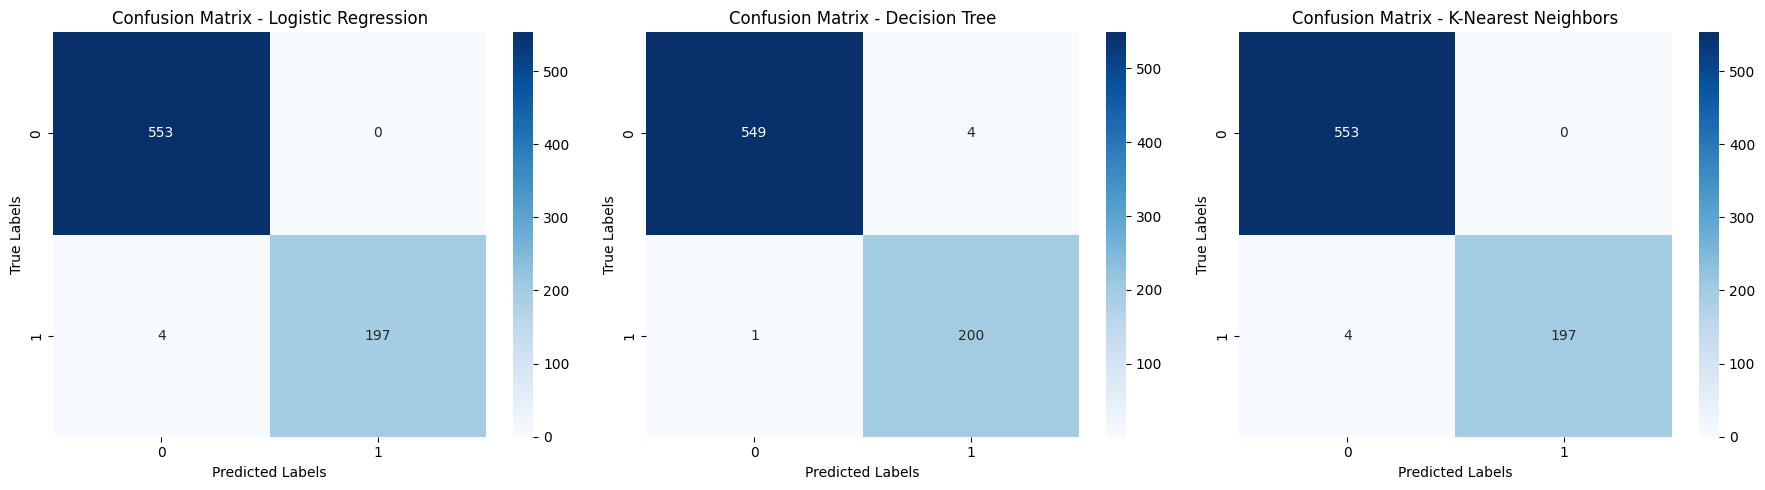

In [24]:
# Determine the number of models to visualize
num_models = len(models)
fig, axes = plt.subplots(1, min(3, num_models), figsize=(18, 5))

# If there's only one model, `axes` is not an array, so wrap it in a list
if num_models == 1:
    axes = [axes]

# Loop through models to display confusion matrices
for i, (model_name, model) in enumerate(models.items()):
    if i >= 3:  # Limit to a maximum of 3 plots side by side
        break

    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrix on the subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(set(y_test)), yticklabels=list(set(y_test)), ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {model_name}")
    axes[i].set_xlabel("Predicted Labels")
    axes[i].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

* Decision tree memiliki 2 true negatif dan 4 false positif. Artinya model salah memprediksi kategori 1 sebagai 0 sebanyak 2, dan salah memprediksi kategori 0 sebagai 1 sebanyak 4.
* Regresi logistik dan KNN memiliki hasil yang sama dimana terdapat 4 data sebagai true negatif. Kemudian tidak ada false positif.
* Secara keseluruhan dalam data ini, model regresi logistik dan KNN lebih baik dari decision tree.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [25]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear']  # Solver algorithm for L1 penalty
}

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.9988636363636363


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [26]:
# Get the best model from GridSearchCV
best_logreg = grid_search.best_estimator_

# Make predictions on train and test data
y_train_pred_tuned = best_logreg.predict(X_train)
y_test_pred_tuned = best_logreg.predict(X_test)

# Evaluate on training data
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
train_precision_tuned = precision_score(y_train, y_train_pred_tuned)
train_recall_tuned = recall_score(y_train, y_train_pred_tuned)
train_f1_tuned = f1_score(y_train, y_train_pred_tuned)

# Evaluate on testing data
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
test_precision_tuned = precision_score(y_test, y_test_pred_tuned)
test_recall_tuned = recall_score(y_test, y_test_pred_tuned)
test_f1_tuned = f1_score(y_test, y_test_pred_tuned)

# Store results in a DataFrame
results_tuned = [
    {"Dataset": "Train", "Accuracy": train_accuracy_tuned, "Precision": train_precision_tuned, "Recall": train_recall_tuned, "F1-Score": train_f1_tuned},
    {"Dataset": "Test", "Accuracy": test_accuracy_tuned, "Precision": test_precision_tuned, "Recall": test_recall_tuned, "F1-Score": test_f1_tuned}
]

df_results_tuned = pd.DataFrame(results_tuned)
df_results_tuned

,Dataset,Accuracy,Precision,Recall,F1-Score
0,Train,1.0,1.0,1.0,1.0
1,Test,1.0,1.0,1.0,1.0


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [27]:
print('Logistic Regression Default:')
df_results[['Dataset', 'Accuracy',	'Precision',	'Recall',	'F1-Score']].iloc[0:2].round(3)

Logistic Regression Default:


,Dataset,Accuracy,Precision,Recall,F1-Score
0,Train,0.995,0.995,0.995,0.995
1,Test,0.995,0.995,0.995,0.995


In [28]:
print('Logistic Regression After Tuning:')
df_results_tuned

Logistic Regression After Tuning:


,Dataset,Accuracy,Precision,Recall,F1-Score
0,Train,1.0,1.0,1.0,1.0
1,Test,1.0,1.0,1.0,1.0


**Kesimpulan:**
* Ketiga model menghasilkan akurasi, presisi, recall, dan F1-score yang sangat tinggi hampir 100% baik saat train maupun test. Itu berarti model sangat baik dalam belajar dari data train dan juga berhasil memprediksi data yang belum dilihat.
* Diambil model regresi logistik sebagai contoh tuning, hasilnya evaluasi di train dan test set meningkat dari 99% menjadi 100%. Artinya hyperparameter terbaik hasil tuning berhasil meningkatkan performa dari model.
* Namun, hasil yang sempurna seperti ini tidak menjamin baik untuk set data lain yang berbeda, karena data yang digunakan untuk train sedikit sehingga model tidak memiliki banyak variasi pada data.
* Meskipun sangat baik pada evaluasi train dan test, model masih terbilang overfit karena terlalu menyesuaikan pada set data yang relatif kecil.

**Rekomendasi:**
* Memakai data yang lebih banyak untuk kebutuhan variasi pelatihan pada train dan juga pada evaluasi data test.